In [39]:
import pandas as pd
import vectorbt as vbt
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
port_csv = pd.read_csv('./crypto_tf1d_backtest.csv', index_col=0)

In [3]:
df = port_csv.drop('BNBUSDT_OBVe_10_40_diff_rsi50.1', axis= 1)

In [4]:
df = df.T

In [5]:
df.columns

Index(['Start', 'End', 'Period', 'Start Value', 'End Value',
       'Total Return [%]', 'Benchmark Return [%]', 'Max Gross Exposure [%]',
       'Total Fees Paid', 'Max Drawdown [%]', 'Max Drawdown Duration',
       'Total Trades', 'Total Closed Trades', 'Total Open Trades',
       'Open Trade P&L', 'Win Rate [%]', 'Best Trade [%]', 'Worst Trade [%]',
       'Avg Winning Trade [%]', 'Avg Losing Trade [%]',
       'Avg Winning Trade Duration', 'Avg Losing Trade Duration',
       'Profit Factor', 'Expectancy', 'Sharpe Ratio', 'Calmar Ratio',
       'Omega Ratio', 'Sortino Ratio', 'Annualized Return Adjust Vol'],
      dtype='object', name='index')

In [41]:
df.loc['BNBUSDT_MA_OBVe_5_35_diff_rsi50_MAe_5_15_diff']['Avg Winning Trade Duration'] / datetime.timedelta

TypeError: unsupported operand type(s) for /: 'str' and 'type'

In [45]:
df.loc[['BNBUSDT_MA_OBVe_5_35_diff_rsi50_MAe_5_15_diff',
       'BTCUSDT_MA_OBVe_5_35_diff_rsi50_MAe_5_15_diff',
       'ETHUSDT_MA_OBVe_5_35_diff_rsi50_MAe_5_15_diff',
       'XRPUSDT_MA_OBVe_5_35_diff_rsi50_MAe_5_15_diff',
       'ADAUSDT_MA_OBVe_5_35_diff_rsi50_MAe_5_15_diff']]['Avg Losing Trade Duration']

BNBUSDT_MA_OBVe_5_35_diff_rsi50_MAe_5_15_diff    5 days 01:08:34.285714285
BTCUSDT_MA_OBVe_5_35_diff_rsi50_MAe_5_15_diff    4 days 10:17:08.571428571
ETHUSDT_MA_OBVe_5_35_diff_rsi50_MAe_5_15_diff    5 days 06:27:41.538461538
XRPUSDT_MA_OBVe_5_35_diff_rsi50_MAe_5_15_diff              3 days 16:40:00
ADAUSDT_MA_OBVe_5_35_diff_rsi50_MAe_5_15_diff              4 days 17:20:00
Name: Avg Losing Trade Duration, dtype: object

In [6]:
df = df[['End Value', 'Total Return [%]', 'Benchmark Return [%]', 'Total Trades', 'Win Rate [%]', 'Avg Winning Trade [%]', 'Avg Losing Trade [%]', 'Expectancy', 'Annualized Return Adjust Vol']]

In [7]:
df = df.astype(float)

In [8]:
df['Return_adj_Benchmark [times]'] = (df['Total Return [%]'] / df['Benchmark Return [%]'])
df['RR_Ratio'] = df['Avg Winning Trade [%]'] / (df['Avg Losing Trade [%]'] * -1)

In [9]:
df_metrics = df[['Annualized Return Adjust Vol', 'Return_adj_Benchmark [times]', 'RR_Ratio', 'Win Rate [%]', 'Expectancy']]

In [10]:
df_metrics = df_metrics.T

In [11]:
### avg each strategy
# each strategy step 5 col
df_metrics['OBVe_10_40_diff_rsi50'] = df_metrics.iloc[:,:5].mean(axis=1)
df_metrics['OBVe_5_40_diff_rsi50'] = df_metrics.iloc[:,5:10].mean(axis=1)
df_metrics['OBVe_5_35_diff_rsi50'] = df_metrics.iloc[:,10:15].mean(axis=1)
df_metrics['MA_OBVe_5_35_diff_rsi50_MAe_6_120_diff'] = df_metrics.iloc[:,15:20].mean(axis=1)
df_metrics['MA_OBVe_5_35_diff_rsi50_MAe_6_60_diff'] = df_metrics.iloc[:,20:25].mean(axis=1)
df_metrics['MA_OBVe_5_35_diff_rsi50_MAe_5_60_diff'] = df_metrics.iloc[:,25:30].mean(axis=1)
df_metrics['MA_OBVe_5_35_diff_rsi50_MAe_5_30_diff'] = df_metrics.iloc[:,30:35].mean(axis=1)
df_metrics['MA_OBVe_5_35_diff_rsi50_MAe_5_15_diff'] = df_metrics.iloc[:,35:40].mean(axis=1)

In [12]:
df_metrics['avg_strategy'] = df_metrics.iloc[:,-8:].mean(axis=1)

In [13]:
df_avg = df_metrics.iloc[:, -9:]

In [15]:
df_avg.iloc[:,-2:]

,MA_OBVe_5_35_diff_rsi50_MAe_5_15_diff,avg_strategy
index,,
Annualized Return Adjust Vol,0.997977,0.895819
Return_adj_Benchmark [times],0.794501,0.876701
RR_Ratio,8.475948,8.425271
Win Rate [%],28.171190,28.177398
Expectancy,33.956842,25.035397


In [163]:
x_label = df_avg.columns

In [207]:
df_avg.plot(kind= 'bar', figsize= (8,8)).set_title('avg_strategy', color=)

Text(0.5, 1.0, 'avg_strategy')

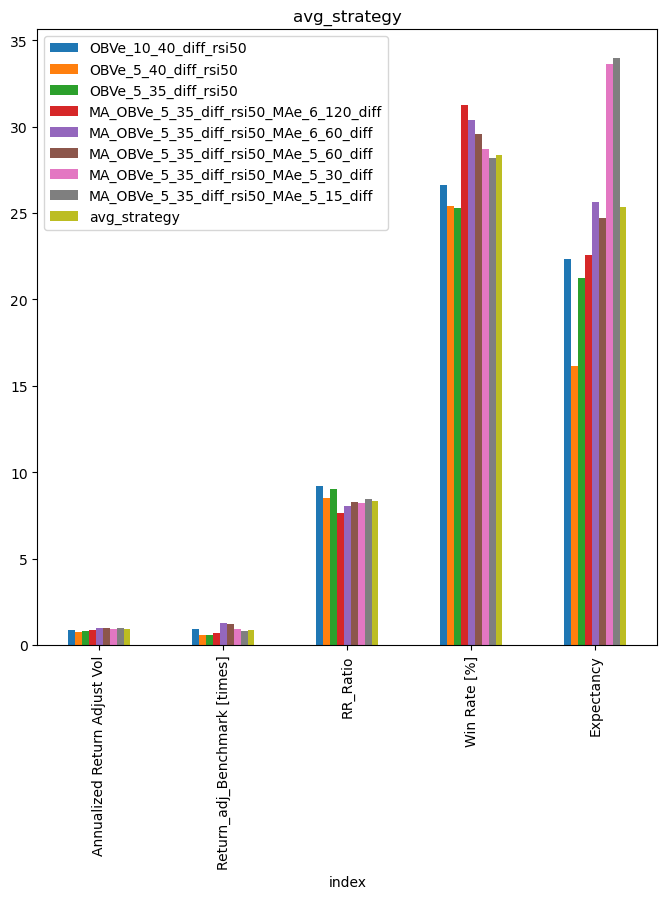

In [208]:
plt.show()

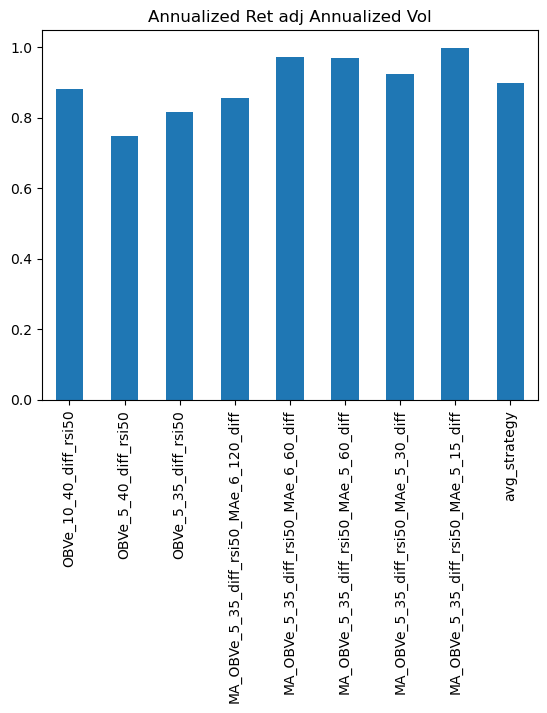

In [209]:
df_avg.iloc[0,].plot(kind ='bar').set_title('Annualized Ret adj Annualized Vol')
plt.show()

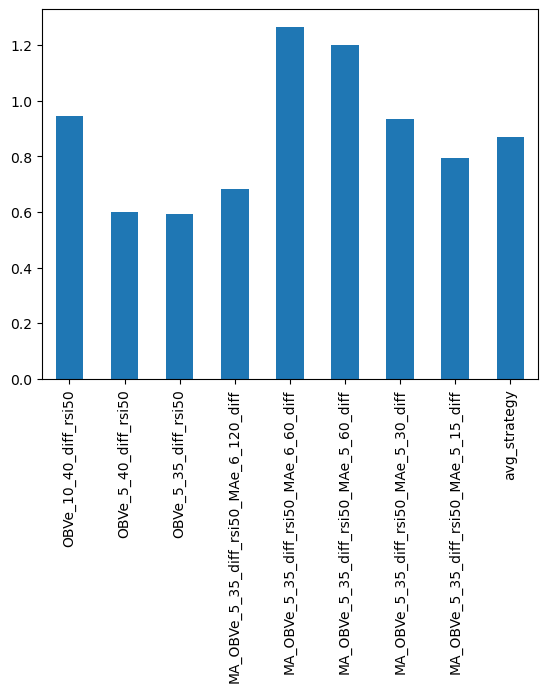

In [184]:
#### plot แยกเฉพาะ row จะได้เป็น แยกแต่ละ metric
df_avg.iloc[1,].plot(kind ='bar')
plt.show()
#### plot แยกเฉพาะ col mี่ละ col จะได้เป็นแต่ละ strat